# 2. Labeling using IndoBERT

This notebook focuses on labeling the collected tweets using IndoBERT, a pre-trained language model tailored for Indonesian. The objective is to classify each tweet's sentiment into categories: positive, negative, or neutral. The notebook outlines the steps for importing the dataset, processing the text, and applying the IndoBERT model to assign sentiment labels, thus preparing the data for further analysis.

# !pip install transformers

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}


In [ ]:
# from transformers import pipeline
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# pretrained= "mdhugol/indonesia-bert-sentiment-classification"

# model = AutoModelForSequenceClassification.from_pretrained(pretrained)
# tokenizer = AutoTokenizer.from_pretrained(pretrained)

# sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# label_index = {'LABEL_0': 'positive', 'LABEL_1': 'negative'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pos_text = "Maaf ya min, pakai qris uang kita makin hilang.\n"
# neg_text = "Berusaha hemat dgn ga ngambil uang cash banyak banyak, eh pas jajan bayarnya malah pake qris"

# result = sentiment_analysis(pos_text)
# status = label_index[result[0]['label']]
# score = result[0]['score']
# print(f'Text: {pos_text} | Label : {status} ({score * 100:.3f}%)')

# result = sentiment_analysis(neg_text)
# status = label_index[result[0]['label']]
# score = result[0]['score']
# print(f'Text: {neg_text} , Label : {status} ({score * 100:.3f}%)')

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/full_qris.csv')
df

,Komentar
0,@Marimadesi Verifikasi data via OTP &gt QRIS ...
1,"@monicayuna Syarat dan ketentuan pilih Setuju""..."
2,@gitayamara Verifikasi data via OTP &gt QRIS ...
3,@danawallet udah 2x24 jam lebih masalah saya d...
4,"@triyuni287 Syarat dan ketentuan pilih Setuju""..."
...,...
7649,Gue merasa lebih terhubung dengan dunia digita...
7650,"QRIS membantu mengurangi limbah kertas struk, ..."
7651,Keamanan QRIS itu sangat penting dalam transak...
7652,"Kadang-kadang QRIS bikin ribet, harus diperbai..."


In [ ]:
# Remove duplicate rows based on the 'full_text' column
df.drop_duplicates(subset=['Komentar'], keep='first', inplace=True)

# Print the DataFrame after removing duplicate
df

,Komentar
0,@Marimadesi Verifikasi data via OTP &gt QRIS ...
1,"@monicayuna Syarat dan ketentuan pilih Setuju""..."
2,@gitayamara Verifikasi data via OTP &gt QRIS ...
3,@danawallet udah 2x24 jam lebih masalah saya d...
4,"@triyuni287 Syarat dan ketentuan pilih Setuju""..."
...,...
7649,Gue merasa lebih terhubung dengan dunia digita...
7650,"QRIS membantu mengurangi limbah kertas struk, ..."
7651,Keamanan QRIS itu sangat penting dalam transak...
7652,"Kadang-kadang QRIS bikin ribet, harus diperbai..."


In [ ]:
#Initialize the sentiment analysis pipeline with the pre-trained model and tokenize

pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [ ]:
#Define a function to apply sentiment analysis to the DataFrame

def analyze_sentiment(text):
    result = sentiment_analysis(text)
    status = label_index[result[0]['label']]
    score = result[0]['score']
    return status, score

In [ ]:
df[['Sentiment', 'Score']] = df['Komentar'].apply(lambda x: pd.Series(analyze_sentiment(x)))

In [ ]:
df

,Komentar,Sentiment,Score
0,@Marimadesi Verifikasi data via OTP &gt QRIS ...,neutral,0.993306
1,"@monicayuna Syarat dan ketentuan pilih Setuju""...",neutral,0.992211
2,@gitayamara Verifikasi data via OTP &gt QRIS ...,neutral,0.994890
3,@danawallet udah 2x24 jam lebih masalah saya d...,negative,0.992498
4,"@triyuni287 Syarat dan ketentuan pilih Setuju""...",neutral,0.993935
...,...,...,...
7649,Gue merasa lebih terhubung dengan dunia digita...,positive,0.677520
7650,"QRIS membantu mengurangi limbah kertas struk, ...",positive,0.977578
7651,Keamanan QRIS itu sangat penting dalam transak...,positive,0.838305
7652,"Kadang-kadang QRIS bikin ribet, harus diperbai...",negative,0.974707


In [ ]:
# Count sentiment occurrences
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
neutral     4823
negative     973
positive     726
Name: count, dtype: int64

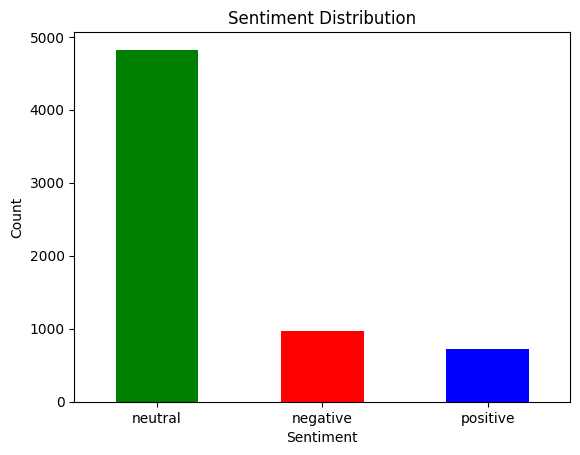

In [ ]:
# Create a bar chart to visualize sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

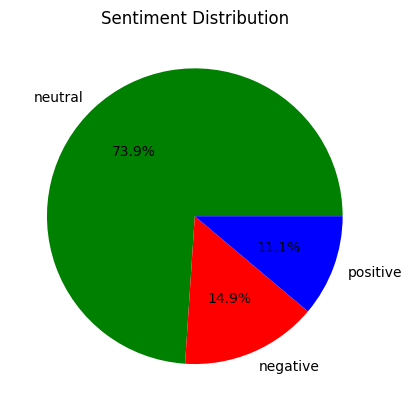

In [ ]:
# Create a pie chart to visualize sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [ ]:
df[df['Sentiment'] == 'negative']

,Komentar,Sentiment,Score
3,@danawallet udah 2x24 jam lebih masalah saya d...,negative,0.992498
32,"Udah belajar cara pake EDC, jauh2 nyamperin, p...",negative,0.930167
43,"qris dana kenapa sih sekarang jelek banget, tr...",negative,0.997056
50,@greenshortalien Klo alasannya tarif qris wah ...,negative,0.958710
51,@__bIaire__ qris dabis error gaada transaksi n...,negative,0.719969
...,...,...,...
7625,"Kadang kesel juga sih sama QRIS, kadang nggak ...",negative,0.994222
7633,"Nggak suka sama QRIS, kadang bikin ribet.",negative,0.989964
7642,Gue nggak bisa bayangin hidup tanpa QRIS sekar...,negative,0.934006
7643,QRIS masih sering ngalamin masalah teknis yang...,negative,0.991247


In [ ]:
df[df['Sentiment'] == 'positive']

,Komentar,Sentiment,Score
37,@promo_BRI Transaksi online dan QRIS makin mud...,positive,0.746914
44,"@promo_BRI Senengnya, sekarang bisa bayar QRIS...",positive,0.978416
47,@promo_BRI Dengan adanya Virtual Credit Card B...,positive,0.501393
52,@promo_BRI Kartu Kredit BRI Virtual emang biki...,positive,0.982283
53,Era digital 2023 ini membantuku dalam berbelan...,positive,0.617955
...,...,...,...
7647,QRIS itu bikin hidup jadi lebih nyaman.,positive,0.984181
7648,Adopsi QRIS menciptakan peluang bisnis baru ya...,positive,0.880264
7649,Gue merasa lebih terhubung dengan dunia digita...,positive,0.677520
7650,"QRIS membantu mengurangi limbah kertas struk, ...",positive,0.977578


In [ ]:
# Save DataFrame to CSV
df.to_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/df_qris_labeled_3kelas.csv', index=False)